# Descrição do projeto

Esse projeto tem como objetivo explorar a análise de um banco de dados dos passageiros do Titanic.

Com as análises busca-se entender quais fatores podem ter influenciado na sobrevivência de um passageiro ao naúfragio do navio.

O banco de dados utilizado e as informações sobre o mesmo foram retirado do seguinte reposítorio do kaggle:

https://www.kaggle.com/c/titanic/overview

*Obs: Quando demais fontes forem utilizadas para auxiliar na análise, as mesmas serão referenciadas.

**Obs: Todos os documentos gerados e utilizados durante esse projeto serão anexados no repositorio do mesmo, assim como um relátorio final com os resultados das análises.

In [1]:
#Primeiro passo: Importar bibliotecas necessárias para o projeto

import pandas as pd
from pandas import Series, DataFrame

In [2]:
# Segundo passo: Criar o Dataframe com o dataset

titanic_dframe = pd.read_csv('01. Titanic_Dataset.csv') #Obtendo os dados do arquivo CSV

titanic_dframe.head() # Pré visualização do DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_dframe.info() #Para uma melhor compreensão dos dados podemos obter as informações dos tipos de variáveis e presença de elementos nulos

# Com as informações podemos perceber que a maioria dos dados faltantes estão presente na coluna 'Age' e 'Cabin'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Agora para guiar as análises, alguns pontos que são possíveis explorar com esse banco de dados foram levantados.

1. ) Quem eram os passageiros do Titanic? Qual a idade dos passageiros, Gênero, Classe em que viajavam, etc...

2. ) Em que andar estavam os passageiros e como isso se relaciona com a Classe em que viajavam?

3. ) De onde vieram os passageiros? 

4. ) Quem estava sozinho e quem estava com a família?

É de importância analisar esses pontos, pois os mesmos podem nos ajudar com insigths para o objetivo final que é verificar qual relação os dados tem com aqueles que sobreviveram ao naufrágio.

# 1. ) Quem eram os passageiros do Titanic? Qual a idade dos passageiros, Gênero, Classe em que viajavam, etc...

In [4]:
# Para começar as análises é necessário a importação de algumas bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

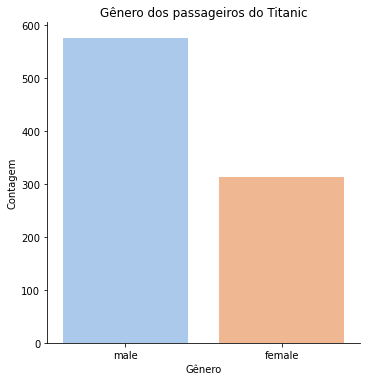

In [5]:
#Inicialmente vamos efetuar uma análise de qual o gênero dos passageiros do Titanic

gender = sns.catplot(data = titanic_dframe, x = 'Sex', kind = 'count', palette = 'pastel')
gender.set(title = 'Gênero dos passageiros do Titanic',
                ylabel = 'Contagem',
                xlabel = 'Gênero')

# Para uma possível montagem que possa ser necessária com esses dados os gráficos gerados estão sendo salvos em uma pasta junto com o projeto.
gender.savefig('01. Titanic Images/01.Genero_passageiros.png', transparent = True)
#Com essa analise podemos avaliar que no navio a maioria dos passageiros eram do sexo masculino

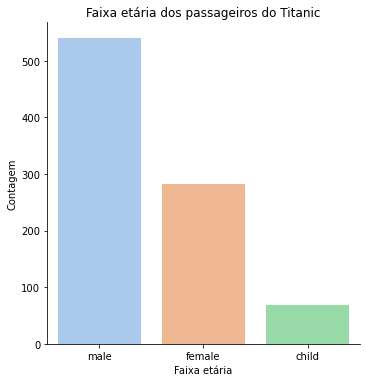

In [6]:
# No caso de naufragios é de consenso comum que mulheres e crianças teriam prioridades na hora de adentrar nos bote salva vidas.
# Portanto podemos fazer uma análise referente ao numero de Homens, mulheres e crianças presentes no Navio

#Para isso sera efetuada uma função para ajudar com essa classificação

def male_female_child(passenger) :
    age, sex = passenger

    if age < 12 :
        return 'child'
    else:
        return sex

#Assim criamos uma coluna no nosso Dataframe com a informação de faixa etaria dos passageiros:

titanic_dframe['age_group'] = titanic_dframe[['Age','Sex']].apply(male_female_child, axis = 1)

#Com isso podemos criar nosso gráfico para análise

age_group = sns.catplot(data = titanic_dframe, x = 'age_group', kind = 'count', palette = 'pastel')
age_group.set(title = 'Faixa etária dos passageiros do Titanic',
                ylabel = 'Contagem',
                xlabel = 'Faixa etária')

age_group.savefig('01. Titanic Images/02.Faixa_etária_passageiros.png', transparent = True)


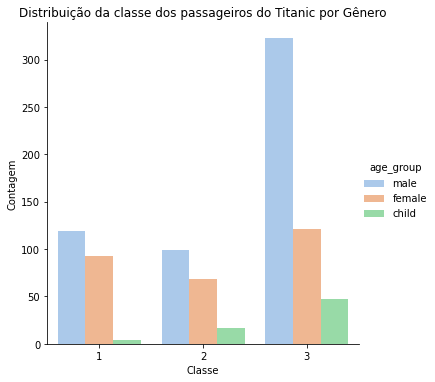

In [7]:
gender_class = sns.catplot(data = titanic_dframe, x = 'Pclass', hue = 'age_group', kind = 'count', palette = 'pastel')
gender_class.set(title = 'Distribuição da classe dos passageiros do Titanic por Gênero',
                ylabel = 'Contagem',
                xlabel = 'Classe')

gender_class.savefig('01. Titanic Images/03.Faixa_etaria_classe_passageiros.png', transparent = True)

# Aprofundando a análise é possível verificar que embora a maioria dos passageiros fosse do sexo masculino, boa parte deles estavam na terceira classe
# É possível também ver como o número de crianças na terceira classe é maior quando comparado com as outras duas


Aprofundando a análise é possível verificar que embora a maioria dos passageiros fosse do sexo masculino, boa parte deles estavam na terceira classe.

É possível também ver como o número de crianças na terceira classe é maior quando comparado com as outras duas

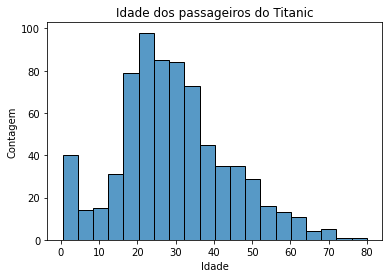

In [8]:
#Podemos efetuar uma análise mais detalhada da idade dos passageiros, onde um histograma pode demonsta melhor esse dado

age = sns.histplot(data = titanic_dframe, x = 'Age', palette = 'pastel')
age.set(title = 'Idade dos passageiros do Titanic',
                ylabel = 'Contagem',
                xlabel = 'Idade')

age.get_figure().savefig('01. Titanic Images/04.Idade_passageiros.png', transparent = True)


Observando o gráfico podemos perceber que a maioria dos passageiros estavam entre os 20 e 25 anos, e no geral a maiori dos passageiros estavam entre 15 e 35 anos.

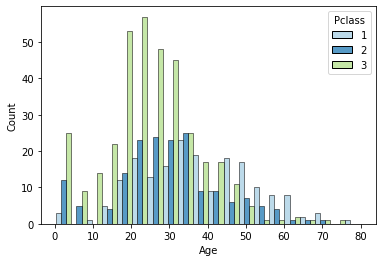

In [9]:
age_class_geral = sns.histplot(data = titanic_dframe, x = 'Age', hue = 'Pclass', palette = 'Paired', multiple = 'dodge')

É possível efetuar uma analise de como eram distribuidas os passageiros pode idade e classe, mas isso em um único histograma não é compreensível


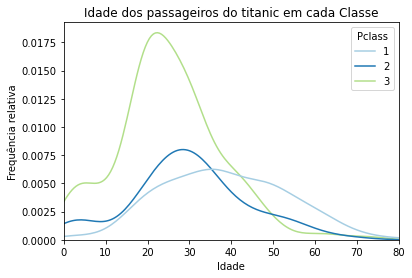

In [10]:
# Utilizando um gráfico de densidade que consiste em mostrar as distribuições das idades em relação a frequência relativa, temos uma melhor visualização.

age_class_geral = sns.kdeplot(data = titanic_dframe, x = 'Age', hue = 'Pclass', palette = 'Paired')
oldest = titanic_dframe['Age'].max()
age_class_geral.set(xlim=(0,oldest),
                    title = 'Idade dos passageiros do titanic em cada Classe',
                    xlabel = 'Idade',
                    ylabel = 'Frequência relativa')

age_class_geral.get_figure().savefig('01. Titanic Images/05.Idade_Classe_passageiros_geral.png', transparent = True)

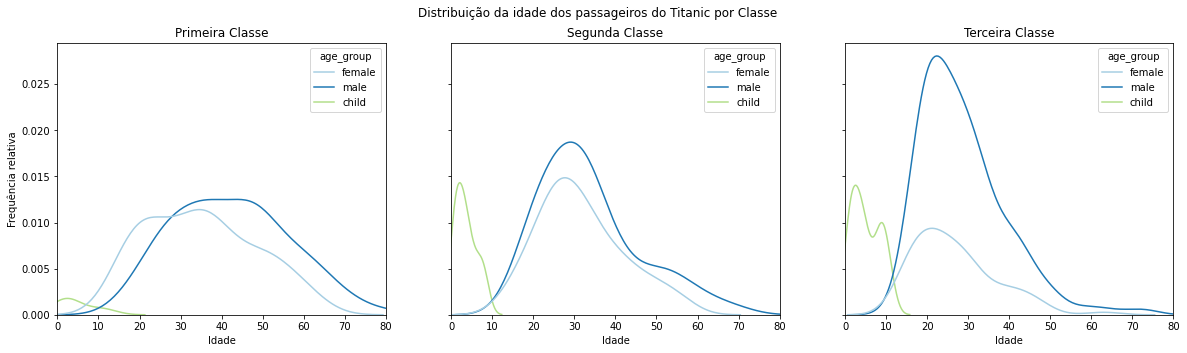

In [11]:
# Para uma melhor visualização vamos criar três histogramas cada um mostrando a distribuição de idade para cada classe
# Para isso os dados serão tratados primeiro:

titanic_dframe_age_class1 = titanic_dframe.loc[titanic_dframe['Pclass'] == 1]

titanic_dframe_age_class2 = titanic_dframe.loc[titanic_dframe['Pclass'] == 2]

titanic_dframe_age_class3 = titanic_dframe.loc[titanic_dframe['Pclass'] == 3]

age_class_distinct, axes = plt.subplots(1,3, figsize = (20,5), sharey = True)
age_class_distinct.suptitle('Distribuição da idade dos passageiros do Titanic por Classe')

sns.kdeplot(data = titanic_dframe_age_class1, x = 'Age', hue = 'age_group', palette = 'Paired', ax = axes[0])

axes[0].set(xlim=(0,oldest),
            title = 'Primeira Classe',
            ylabel = 'Frequência relativa',
            xlabel = 'Idade')

sns.kdeplot(data = titanic_dframe_age_class2, x = 'Age', hue = 'age_group', palette = 'Paired', ax = axes[1])
axes[1].set(xlim=(0,oldest),
            title = 'Segunda Classe',
            xlabel = 'Idade')

sns.kdeplot(data = titanic_dframe_age_class3, x = 'Age', hue = 'age_group', hue_order = ['female','male','child'], palette = 'Paired', ax = axes[2])
axes[2].set(xlim=(0,oldest),
            title = 'Terceira Classe',
            xlabel = 'Idade')

age_class_distinct.savefig('01. Titanic Images/06.Idade_Classe_passageiros_distinto.png', transparent = True)

Podemos observar que a primeira classe apresenta uma distribuição mais normal dos passageiros do sexo masculino e feminino, enquanto na terceira classe existe uma presença maior de homnes e mulheres proximos aos 25 anos. 

# 2. ) Em que andar estavam os passageiros e como isso se relaciona com a classe que viajavam ?

In [12]:
# Vamos chamar novamente o nosso dataframe para analisar a coluna de cabines

titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Inicialmente precisamos entender a coluna das cabines.

A letra inicial em cada uma dos itens na coluna da cabine significa o andar que a cabine se encontra. Ex: A001, a cabine esta no andar A.

Fazendo uma análise rapida nas primeiras linhas do dataframe é possível analisar que o mesmo possui valores vazios na coluna de cabine.

In [13]:
#Inicialmente vamos criar um dataframe sem os dados nulos da coluna cabine

deck_df = titanic_dframe.dropna(subset = ['Cabin'])

deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female


<ipython-input-14-49229d588913>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deck_df['Level'] = deck_df['Cabin'].apply(cabin_level)


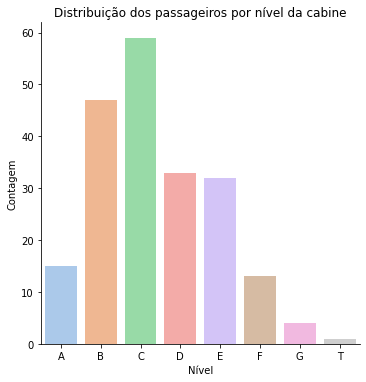

In [14]:
# Agora precisamos pegar apenas a primeira letra de cada uma das cabines, para identificar em qual level elas se encontram.
# Por isso vamos definir uma função para retornar a primeira letra dos elementos da coluna Cabin

def cabin_level(levels) :
    cabin = levels
    return levels[0]

# Com a função definida é possível criar uma coluna com esses dados no deck_df

deck_df['Level'] = deck_df['Cabin'].apply(cabin_level)

#Com isso podemos dar gerar um grafíco de barras para obter um overview sobre os níveis existentes no navio

deck_overview = sns.catplot(data = deck_df, x = 'Level', order =['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], kind = 'count', palette = 'pastel')
deck_overview.set(title = 'Distribuição dos passageiros por nível da cabine',
                  xlabel = 'Nível',
                  ylabel = 'Contagem')


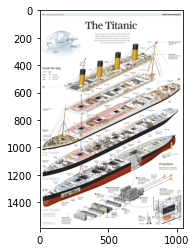

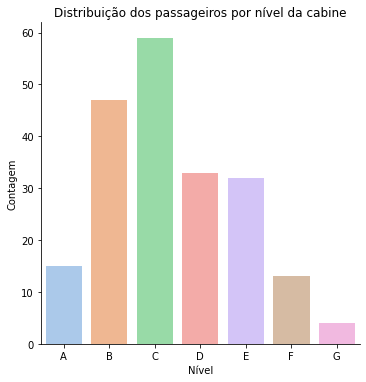

In [15]:
# Vamos dar uma olhada no esquemático do Titanic para entender melhor onde cada nível se encontra.
# Fonte da Imagem: http://graphics-info.blogspot.com/2012/09/our-titanic-work.html

import matplotlib.image as mpimg
from skimage.transform import resize

titanic_nv = mpimg.imread('TITANIC.jpg')
titanic_nv_plot = plt.imshow(titanic_nv)
plt.show()



# Com a análise do esquematico do Titanic nível T não faz sentindo para a análise, portanto o dado que contém essa informação serão desconsiderados

deck_df = deck_df.loc[deck_df['Level'] != 'T']

deck_overview = sns.catplot(data = deck_df, x = 'Level', order =['A', 'B', 'C', 'D', 'E', 'F', 'G'], kind = 'count', palette = 'pastel')
deck_overview.set(title = 'Distribuição dos passageiros por nível da cabine',
                  xlabel = 'Nível',
                  ylabel = 'Contagem')

deck_overview.savefig('01. Titanic Images/07.Nivel_passageiros.png', transparent = True)

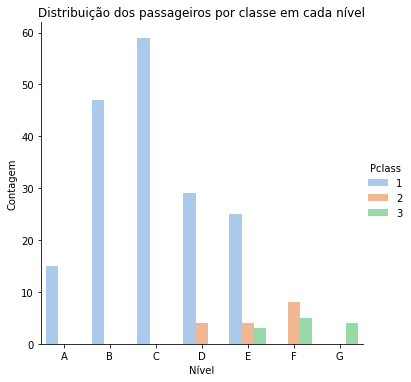

In [16]:
# Assim podemos efetuar uma análise referente a como é a distribuição das classes em cada um dos níveis

deck_class = sns.catplot(data = deck_df, x = 'Level', hue = 'Pclass', order =['A', 'B', 'C', 'D', 'E', 'F', 'G'], kind = 'count', palette = 'pastel')
deck_class.set(title = 'Distribuição dos passageiros por classe em cada nível',
               xlabel = 'Nível',
               ylabel = 'Contagem')

deck_class.savefig('01. Titanic Images/08.Nivel_Classe_passageiros.png', transparent = True)


A partir daqui é interessante fazer algumas análises mostrando o esperado. A maioria dos passageiros de primeira classe se encontram no níveis superiores (A até E), enquanto os passageiros de segunda classe se distribuem entre os níveis D e F, já o nível mais inferior que é o nível G possui apenas passageiros da terceira classe registrados.

# 3. ) De onde os passageiros vieram ?

In [17]:
# Vamos chamar novamente o nosso dataframe para analisar a coluna do local onde os passageiros embarcaram (Embarked)

titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


De acordo com a fonte dos dados no site da Kaggle, cada uma das letras na coluna Embarked se refere a uma cidade de embarque onde:

C = Cherbourg

Q = Queenstown

S = Southampton

In [18]:
# Para facilitar a visualização dos nomes das cidades vamos criar uma coluna chamada City que possui o nome das cidades
# Uma das maneiras mais faceis de se fazer isso é com a utilização da função map, por isso a primeira coisa que devemos fazer é um dicionario

city_map = {'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}

# Após isso aplicar a função map()

titanic_dframe['City'] = titanic_dframe['Embarked'].map(city_map)

#Após a substituição a coluna embarked não é mais necessária

titanic_dframe.drop(columns = ['Embarked'], inplace = True)

titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,age_group,City
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,male,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,female,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,female,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,female,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,male,Southampton


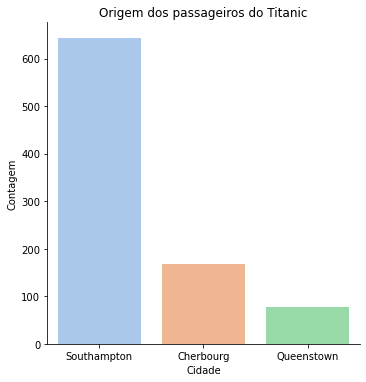

In [19]:
# Agora é possível efetuar uma análise de onde os passageiros vieram

embarked_origins = sns.catplot(data = titanic_dframe, x = 'City', kind = 'count', palette = 'pastel')
embarked_origins.set(title = 'Origem dos passageiros do Titanic',
                     xlabel = 'Cidade',
                     ylabel = 'Contagem')

embarked_origins.savefig('01. Titanic Images/09.Origem_passageiros.png', transparent = True)

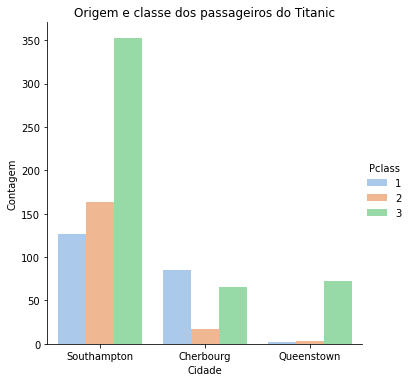

In [20]:
#Tendo em conta a distribuição dos passageiros de acordo com a cidade vamos analisar como está o embarque de acordo com a classe e cidade

embarked_origins_class = sns.catplot(data = titanic_dframe, x = 'City', hue = 'Pclass', kind = 'count', palette = 'pastel')
embarked_origins_class.set(title = 'Origem e classe dos passageiros do Titanic',
                     xlabel = 'Cidade',
                     ylabel = 'Contagem')

embarked_origins_class.savefig('01. Titanic Images/10.Origem_classe_passageiros.png', transparent = True)



É possível observar que os passageiros de primeira classe em sua maioria embarcaram em Southampton, assim como a maior parte da terceira classe.
Isso faz sentindo visto que a cidade desde aquela época é um dos mais importantes portos do Reino Unido, o que pode indicar que a região concentrava um numero maior de pessoas, tendo uma maior distribuição de classes. É importante ressaltar que o Titanic partiu dessa cidade, portanto isso pode ter influenciado que a maioria dos passageiros tenham embarcado na mesma.

fonte: https://pt.wikipedia.org/wiki/Southampton

# 4. ) Quem estava sozinho e quem estava em família ?

In [21]:
# Vamos chamar novamente o nosso dataframe para analisar as colunas referente a presença de familiares do passageiro no navio (SibSP e Parch)

titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,age_group,City
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,male,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,female,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,female,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,female,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,male,Southampton


De acordo com a pagina de obtenção de dados do Kaggle, temos que a seguinte descrição:

SibSp = Essa coluna indica a presença de irmãos, meio-irmãos, marido e esposa no navio.

Parch = Essa coluna indica a presença dos pais ou filhos da pessoa no navio.

In [22]:
# Podemos criar uma coluna que nós diga se a pessoa estava sozinha (Alone) ou acompanhada (  with Family)

# Vamos criar uma função para isso

def alone_family(family) :
    SibSp, Parch = family

    if (SibSp + Parch) != 0 :
        return 'with Family'
    else :
        return 'Alone'

titanic_dframe['Alone'] = titanic_dframe[['SibSp','Parch']].apply(alone_family, axis = 1)

titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,age_group,City,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,male,Southampton,with Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,female,Cherbourg,with Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,female,Southampton,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,female,Southampton,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,male,Southampton,Alone


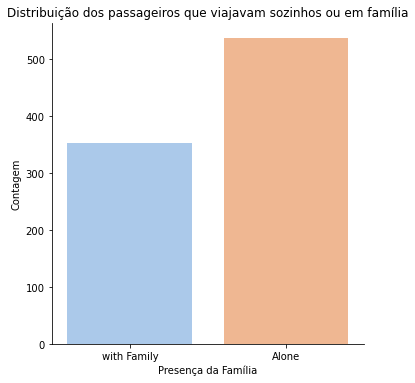

In [23]:
#Agora podemos analisar com clareza os passageiros que estavam sozinhos e os passageiros que estavam com a familia

family_status = sns.catplot(data = titanic_dframe, x = 'Alone', kind = 'count', palette = 'pastel')
family_status.set(title = 'Distribuição dos passageiros que viajavam sozinhos ou em família',
                  xlabel = 'Presença da Família',
                  ylabel = 'Contagem')

family_status.savefig('01. Titanic Images/11.Familia_passageiros.png', transparent = True)

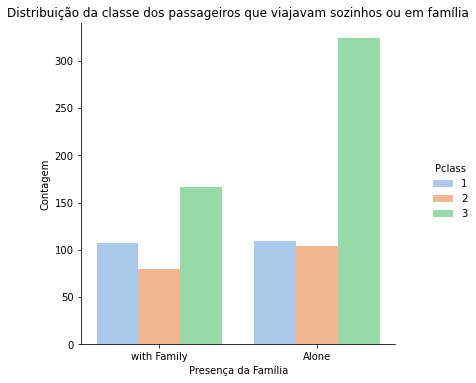

In [24]:
#Podemos aprofundar ainda mais a análise com descobrindo a classe que daqueles que viajavam sozinhos e com a familia.

family_status_class = sns.catplot(data = titanic_dframe, x = 'Alone', hue = 'Pclass', kind = 'count', palette = 'pastel')
family_status_class.set(title = 'Distribuição da classe dos passageiros que viajavam sozinhos ou em família',
                  xlabel = 'Presença da Família',
                  ylabel = 'Contagem')

family_status_class.savefig('01. Titanic Images/12.Familia_classe_passageiros.png', transparent = True)

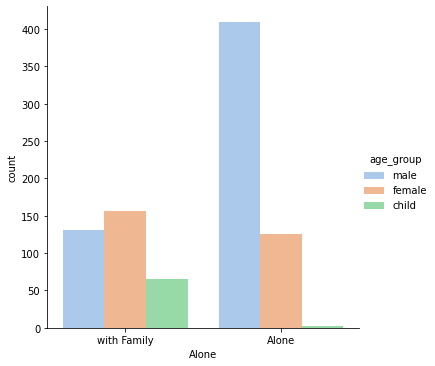

In [25]:
#Fazendo uma análise tendo como referência a faixa etaria

family_status_age = sns.catplot(data = titanic_dframe, x = 'Alone', hue = 'age_group', kind = 'count', palette = 'pastel')
family_status_class.set(title = 'Distribuição da faixa etária dos passageiros que viajavam sozinhos ou em família',
                  xlabel = 'Presença da Família',
                  ylabel = 'Contagem')

family_status_class.savefig('01. Titanic Images/13.Familia_idade_passageiros.png', transparent = True)

Podemos perceber que a maioria das pessoas viajavam sozinhas e que das pessoas que viajavam sozinhas a maioria eram da terceira classe e homens.

Como esperado praticamente nenhuma criança viajava sozinha. 

# Buscando correlações para poder determinar fatores que contribuiram para os passageiros que sobreviveram.

Agora com um conhecimento mais amplo sobre o nosso dataset podemos estudar possíveis correlações que auxiliaram aqueles que sobreviveram ao naufrágio.

In [26]:
# Vamos chamar novamente o nosso dataframe para analisar a coluna de sobreviventes (Survived)

titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,age_group,City,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,male,Southampton,with Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,female,Cherbourg,with Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,female,Southampton,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,female,Southampton,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,male,Southampton,Alone


In [27]:
# Podemos criar uma coluna para informar com sim ou não se o passageiro sobreviveu

titanic_dframe['Survivor'] = titanic_dframe['Survived'].map({0 : 'No', 1 : 'Yes'})

titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,age_group,City,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,male,Southampton,with Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,female,Cherbourg,with Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,female,Southampton,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,female,Southampton,with Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,male,Southampton,Alone,No


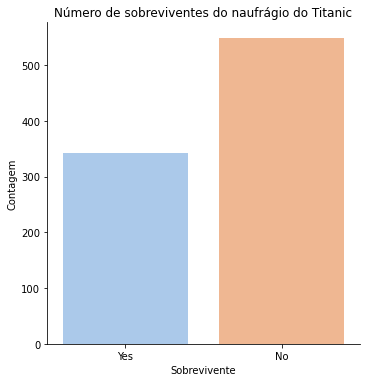

In [28]:
#Primeiramente vamos analisar quantos sobreviventes temos

survivors = sns.catplot(data = titanic_dframe, x = 'Survivor',order = ['Yes', 'No'], kind = 'count', palette = 'pastel')
survivors.set(title = 'Número de sobreviventes do naufrágio do Titanic',
              xlabel = 'Sobrevivente',
              ylabel = 'Contagem')

survivors.savefig('01. Titanic Images/14.Sobrevivência_passageiros.png', transparent = True)

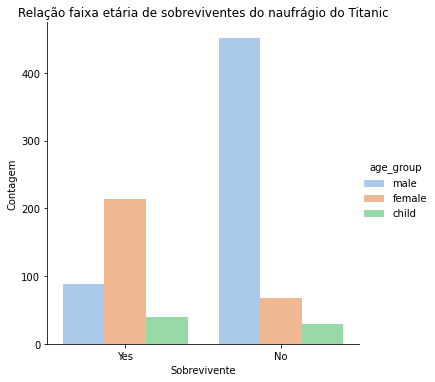

In [29]:
#Aprofundando a análise e mostrando a distribuição dos sobreviventes de acordo com a faixa etária

survivors = sns.catplot(data = titanic_dframe, x = 'Survivor',order = ['Yes', 'No'], hue = 'age_group', kind = 'count', palette = 'pastel')
survivors.set(title = 'Relação faixa etária de sobreviventes do naufrágio do Titanic',
              xlabel = 'Sobrevivente',
              ylabel = 'Contagem')

survivors.savefig('01. Titanic Images/15.Sobrevivência_idade_passageiros.png', transparent = True)

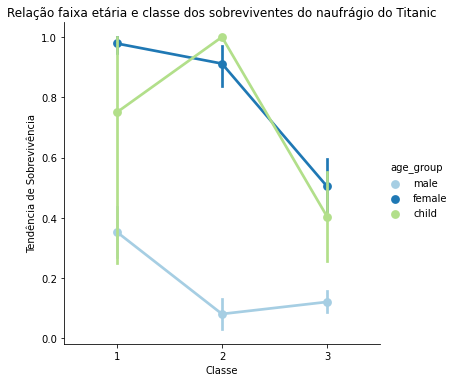

In [30]:
# É possível analisar a tendência de sobrevivência dos passageiros do navio de aconrdo com a sua classe e sexo

survivors = sns.catplot(data = titanic_dframe, y = 'Survived',x = 'Pclass', hue = 'age_group', kind = 'point', palette = 'Paired')
survivors.set(title = 'Relação faixa etária e classe dos sobreviventes do naufrágio do Titanic',
              xlabel = 'Classe',
              ylabel = 'Tendência de Sobrevivência')

survivors.savefig('01. Titanic Images/16.Sobrevivência_idade_passageiros.png', transparent = True)

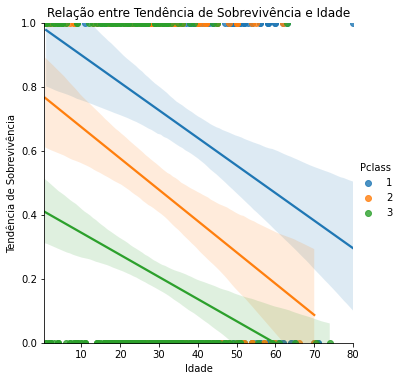

In [31]:
# Podemos analisar também se existe alguma correlação entre a idade dos passageiros e a sua tendência de sobrevivência em cada classe

age_class = sns.lmplot(data = titanic_dframe, x = 'Age', y = 'Survived', hue = 'Pclass')
age_class.set(ylim = [0,1],
              title = 'Relação entre Tendência de Sobrevivência e Idade',
              xlabel = 'Idade',
              ylabel = 'Tendência de Sobrevivência')

age_class.savefig('01. Titanic Images/17.Sobrevivência_idade_classe_passageiros.png', transparent = True)

<ipython-input-32-38f706820e7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deck_df['Survivor'] = deck_df['Survived'].map({0 : 'No', 1 : 'Yes'})
<ipython-input-32-38f706820e7c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deck_df.sort_values(by = 'Level', inplace = True)


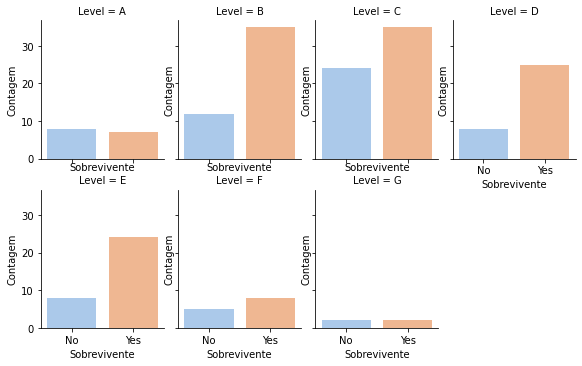

In [32]:
# Criando a coluna do sobreviventes no dataframe que contém as informações sobre o nível em que os passageiros se encontram 

deck_df['Survivor'] = deck_df['Survived'].map({0 : 'No', 1 : 'Yes'})

deck_df.sort_values(by = 'Level', inplace = True)

# Criando um gráfico para análise

deck_survivor = sns.catplot(data = deck_df, x = 'Survivor', col = 'Level', col_wrap = 4, kind = 'count', palette = 'pastel', 
                            height=2.5, aspect=.8)
deck_survivor.set(xlabel = 'Sobrevivente', ylabel = 'Contagem')

deck_survivor.savefig('01. Titanic Images/18.Sobrevivência_deck_passageiros.png', transparent = True)

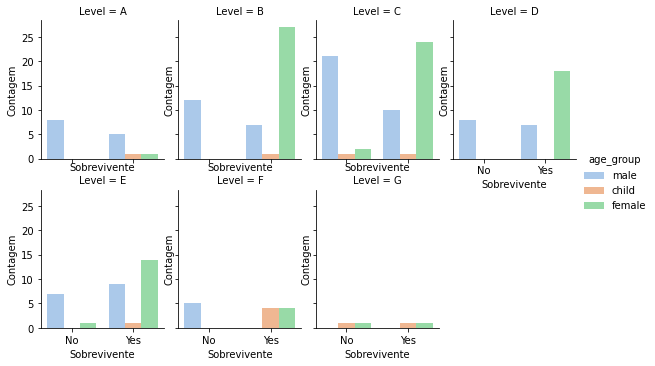

In [33]:
# É possível aprofundar a ánalise acima observando a faixa etária de cada nível.

deck_survivor_sex = sns.catplot(data = deck_df, x = 'Survivor', col = 'Level', hue = 'age_group',  col_wrap = 4, kind = 'count', palette = 'pastel', 
                            height=2.5, aspect=.8)
deck_survivor_sex.set(xlabel = 'Sobrevivente', ylabel = 'Contagem')

deck_survivor_sex.savefig('01. Titanic Images/19.Sobrevivência_deck_idade_passageiros.png', transparent = True)


In [34]:
#Essa celula foi utilizada para obtenção dos dados utilizados nas tabelas

#Nesse exemplo foi adquirido o número de homens na terceira classe do navio

teste = titanic_dframe.loc[titanic_dframe['age_group'] == 'male']

teste2 = teste.loc[teste['Pclass'] == 3]

teste2.count()

PassengerId    323
Survived       323
Pclass         323
Name           323
Sex            323
Age            229
SibSp          323
Parch          323
Ticket         323
Fare           323
Cabin            5
age_group      323
City           323
Alone          323
Survivor       323
dtype: int64